In [1]:
#import libraries
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

In [2]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape:",x_train.shape)
print("y_train.shape:",y_train.shape)

x_train.shape: (50000, 32, 32, 3)
y_train.shape: (50000,)


In [3]:
# number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [4]:
# Build the model
i = Input(shape = x_train[0].shape)
x = Conv2D(32, (3, 3), activation = 'relu',padding = 'same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation = 'relu',padding = 'same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
x = Dropout(0.2)(x)

x = Conv2D(64, (3, 3), activation = 'relu',padding = 'same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation = 'relu',padding = 'same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
x = Dropout(0.2)(x)

x = Conv2D(128, (3, 3), activation = 'relu',padding = 'same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation = 'relu',padding = 'same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
x = Dropout(0.2)(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation = 'relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation = 'softmax')(x)

model = Model(i,x)


In [5]:
# Compile amd fit
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
r= model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 291s 185ms/step - loss: 1.4119 - accuracy: 0.5132 - val_loss: 1.0443 - val_accuracy: 0.6361
Epoch 2/15
1563/1563 [==============================] - 273s 175ms/step - loss: 0.9465 - accuracy: 0.6715 - val_loss: 0.8626 - val_accuracy: 0.7029
Epoch 3/15
1563/1563 [==============================] - 253s 162ms/step - loss: 0.8052 - accuracy: 0.7219 - val_loss: 0.7406 - val_accuracy: 0.7521
Epoch 4/15
1563/1563 [==============================] - 267s 171ms/step - loss: 0.7061 - accuracy: 0.7572 - val_loss: 0.8034 - val_accuracy: 0.7362
Epoch 5/15
1563/1563 [==============================] - 256s 164ms/step - loss: 0.6382 - accuracy: 0.7806 - val_loss: 0.6467 - val_accuracy: 0.7875
Epoch 6/15
1563/1563 [==============================] - 252s 162ms/step - loss: 0.5699 - accuracy: 0.8046 - val_loss: 0.6429 - val_accuracy: 0.7819
Epoch 7/15
1563/1563 [==============================] - 319s 204ms/step - loss: 0.5218 - accuracy: 0.8209 - val_

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# model.compile(optimizer = 'adam',
#               loss = 'sparse_categorical_crossentropy',
#               metrics = ['accuracy'])
data_generator = ImageDataGenerator(width_shift_range = 0.1,
                                    height_shift_range = 0.1,
                                    horizontal_flip = True)
batch_size=32
train_generator = data_generator.flow(x_train, y_train, batch_size)

steps_per_epoch = x_train.shape[0] // batch_size
r = model.fit_generator(train_generator,validation_data = (x_test, y_test), steps_per_epoch = steps_per_epoch, epochs = 50)

C:\Users\hebli\AppData\Local\Temp\ipykernel_11504\4134921745.py:12: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(train_generator,validation_data = (x_test, y_test), steps_per_epoch = steps_per_epoch, epochs = 50)


Epoch 1/50
1562/1562 [==============================] - 24408s 16s/step - loss: 0.6170 - accuracy: 0.7926 - val_loss: 0.4979 - val_accuracy: 0.8350
Epoch 2/50
1562/1562 [==============================] - 256s 164ms/step - loss: 0.5462 - accuracy: 0.8133 - val_loss: 0.5111 - val_accuracy: 0.8301
Epoch 3/50
1562/1562 [==============================] - 258s 165ms/step - loss: 0.5276 - accuracy: 0.8198 - val_loss: 0.5333 - val_accuracy: 0.8227
Epoch 4/50
1562/1562 [==============================] - 260s 167ms/step - loss: 0.5097 - accuracy: 0.8264 - val_loss: 0.4369 - val_accuracy: 0.8533
Epoch 5/50
1562/1562 [==============================] - 260s 167ms/step - loss: 0.4861 - accuracy: 0.8338 - val_loss: 0.4451 - val_accuracy: 0.8500
Epoch 6/50
1562/1562 [==============================] - 1056s 676ms/step - loss: 0.4772 - accuracy: 0.8360 - val_loss: 0.4636 - val_accuracy: 0.8419
Epoch 7/50
1562/1562 [==============================] - 281s 180ms/step - loss: 0.4680 - accuracy: 0.8390 - val

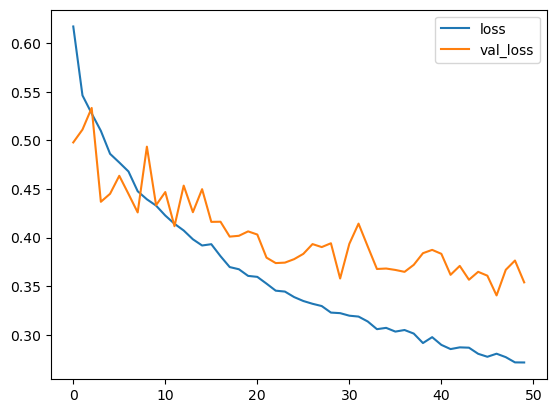

In [17]:
#plot loss per iteration
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

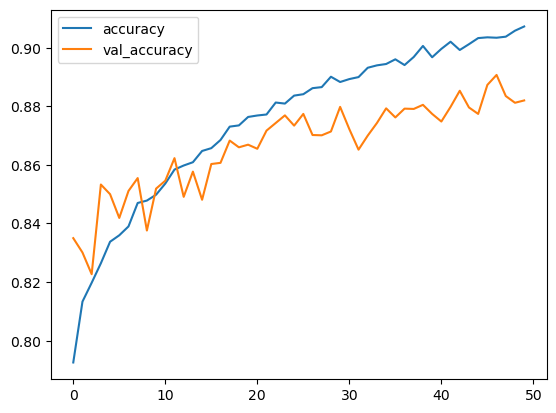

In [8]:
#plot loss per iteration
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()

313/313 [==============================] - 11s 33ms/step
Confusion matrix, without normalization
[[935  11   8   9   2   3   3   5  13  11]
 [  4 963   0   2   0   0   0   0   3  28]
 [ 47   2 765  38  27  41  51  21   2   6]
 [ 12   3  15 779  22 101  36  16   3  13]
 [  8   2  22  26 862  21  33  23   3   0]
 [  6   4   7  99  23 830  10  18   1   2]
 [  5   1   9  38   5   5 926   6   2   3]
 [  6   1   0  15  18  20   0 936   1   3]
 [ 51  19   2   3   0   0   3   3 903  16]
 [ 16  51   0   5   1   1   1   1   3 921]]


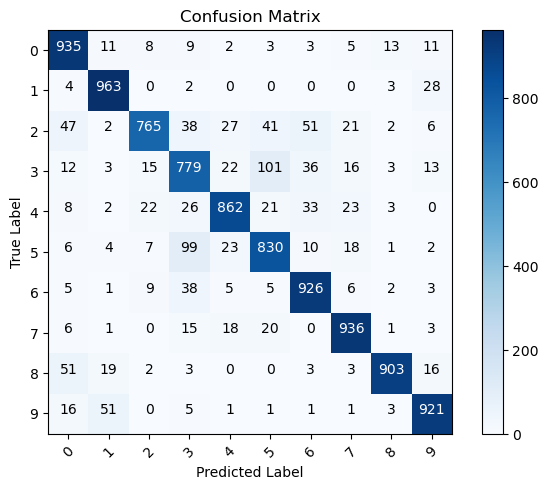

In [9]:
# plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np

def plot_confusion_matrix(cm, classes, normalize = False, title = 'Confusion Matrix', cmap = plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting 'normalize = True'.
  """
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix, without normalization")

  print(cm)

  plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment = 'center',
             color = 'white' if cm[i, j] > thresh else 'black')
  plt.tight_layout()
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [10]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

Text(0.5, 1.0, 'True label: ship Predicted: bird')

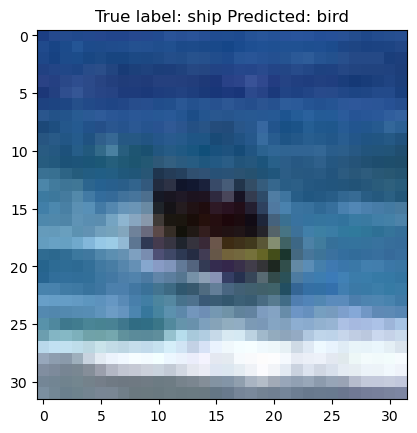

In [15]:
# show misclassified samples
missclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(missclassified_idx)
plt.imshow(x_test[i], cmap = 'gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]))

Text(0.5, 1.0, 'True label: airplane Predicted: airplane')

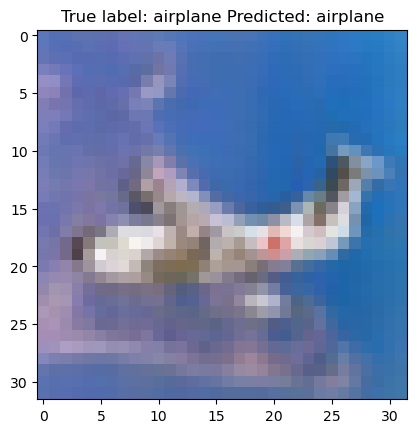

In [14]:
# show classified samples
classified_idx = np.where(p_test == y_test)[0]
i = np.random.choice(classified_idx)
plt.imshow(x_test[i], cmap = 'gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]))

Text(0.5, 1.0, 'True label: frog Predicted: frog')

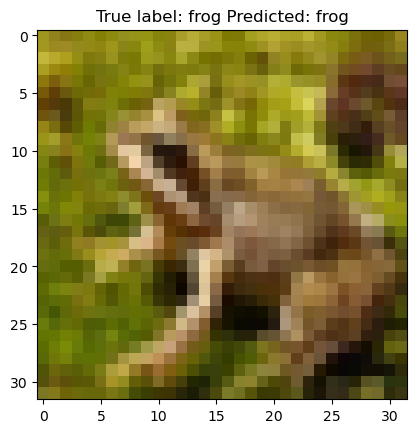

In [13]:
# prediction
predicted_idx = np.where(p_test)[0]
i = np.random.choice(predicted_idx)
plt.imshow(x_test[i], cmap = 'gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]))